In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fcc=pd.read_csv("FCCU_YPC_SampleData422.csv")
fcc.head()

Fmakeup     Tbex     TBst  Pstable  Pabsob  Fstale  Freflux      FC2  \
0   39.922  113.625  172.185    1.039   1.097  56.348   50.773  121.590   
1   39.787  113.638  171.945    1.039   1.100  57.088   51.141  121.672   
2   40.296  113.713  172.101    1.039   1.104  57.105   50.963  121.842   
3   40.362  114.334  172.892    1.038   1.101  55.736   50.874  122.002   
4   40.480  113.871  172.096    1.038   1.105  57.412   50.909  121.971   

           Y  
0  69.486993  
1  69.826046  
2  69.593423  
3  69.316659  
4  69.634658

In [2]:
# splitter Y to 4 binner,  

X=fcc.loc[:,"Fmakeup":"FC2"]
y=fcc.loc[:,'Y']
X.head(),y.head()

(   Fmakeup     Tbex     TBst  Pstable  Pabsob  Fstale  Freflux      FC2
 0   39.922  113.625  172.185    1.039   1.097  56.348   50.773  121.590
 1   39.787  113.638  171.945    1.039   1.100  57.088   51.141  121.672
 2   40.296  113.713  172.101    1.039   1.104  57.105   50.963  121.842
 3   40.362  114.334  172.892    1.038   1.101  55.736   50.874  122.002
 4   40.480  113.871  172.096    1.038   1.105  57.412   50.909  121.971,
 0    69.486993
 1    69.826046
 2    69.593423
 3    69.316659
 4    69.634658
 Name: Y, dtype: float64)

In [3]:
#visually looking at relationship of data
#pd.plotting.scatter_matrix(X,diagonal="kde",figsize=(15,15))
#plt.show()

In [4]:
# flag the data based on Y quantrile,  focus on top 25%
binflag_4=['4','3','2','1']
binflag_4=['red','yellow','blue','green']
fcc['binner']=pd.qcut(fcc['Y'],q=[0,0.25,0.5,0.75,1.0],labels=binflag_4)


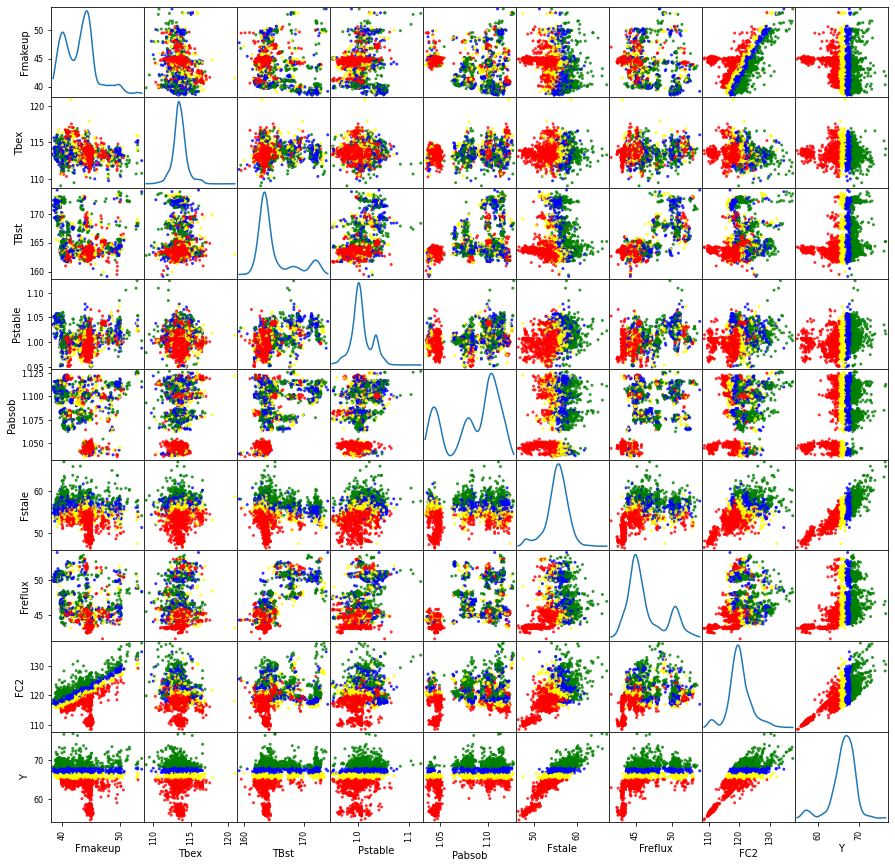

In [16]:
pd.plotting.scatter_matrix(fcc.loc[:,"Fmakeup":"Y"],diagonal="kde",figsize=(15,15),alpha=0.8,c=fcc['binner'])
plt.show()

In [6]:
# using Python Machine Learning SK learn package
from sklearn.cluster import KMeans



In [7]:
# Test K-means

kmeans_estimator = KMeans(n_clusters=6)
kmeans_estimator.fit(X)
label_pred = kmeans_estimator.labels_ 
centroids = kmeans_estimator.cluster_centers_ 
inertia = kmeans_estimator.inertia_ 

# using pandas pivot table to compare the result.

pt=pd.DataFrame(fcc['binner']).astype("category")
pt['kmeans']=pd.DataFrame(label_pred).astype("category")
pt['count']=1
pt.pivot_table(index="binner",columns="kmeans",values="count",aggfunc="count")

kmeans    0    1    2    3    4   5
binner                             
red     117    6   27  388  167   8
yellow  154   60   80  376    0  43
blue    198  175  212   66    0  62
green   169  224  240    0    0  80

In [8]:
# Test KNN

In [9]:
# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X_train=pd.DataFrame(sc.fit_transform(X),columns=X.columns)

pca_estimator=PCA(n_components=8)

reduced_X=pd.DataFrame(pca_estimator.fit_transform(X_train))

pcc=pca_estimator.components_

print("Explained variance ration and variance value")

evr=pca_estimator.explained_variance_ratio_

for i in range(1,len(evr)):
    evr[i]=evr[i]+evr[i-1]
    
evr



Explained variance ration and variance value


array([0.36299771, 0.58176815, 0.72288515, 0.83132154, 0.91276789,
       0.97370719, 0.99347673, 1.        ])

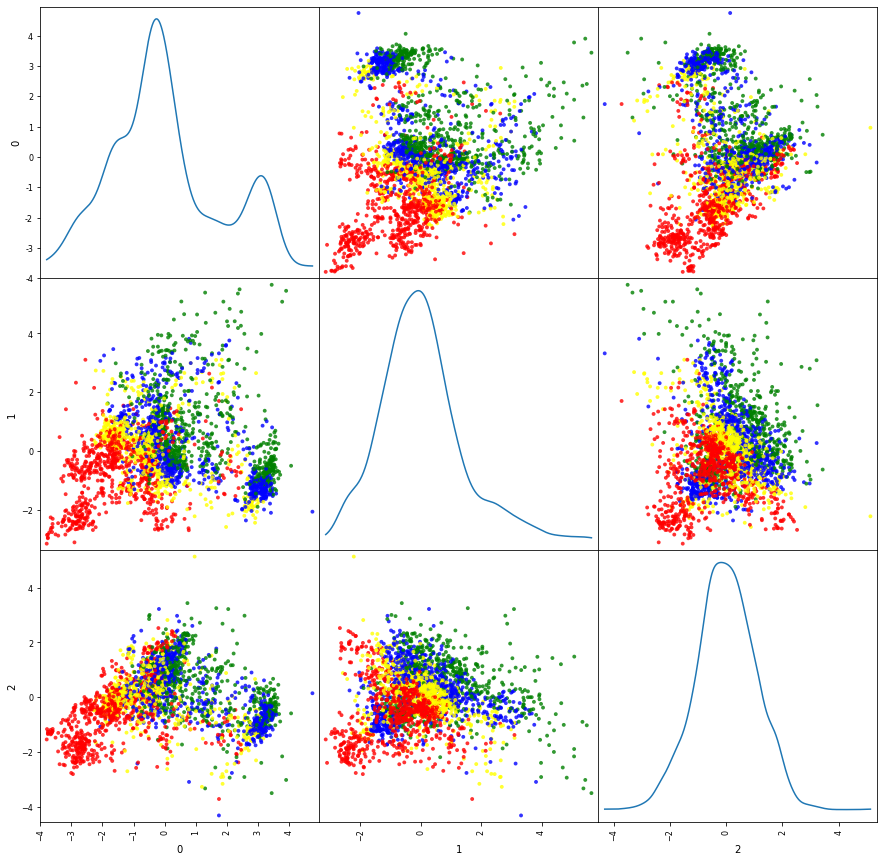

In [15]:
pd.plotting.scatter_matrix(reduced_X.iloc[:,:3],diagonal="kde",figsize=(15,15),s=60,alpha=0.8,c=fcc['binner'])
plt.show()

In [11]:
reduced_X.head()


0         1         2         3         4         5         6  \
0  3.302803 -0.421891 -0.890862 -0.233238  0.513031 -0.344897  0.439794   
1  3.478608 -0.325403 -0.662172 -0.336665  0.528748 -0.354836  0.311853   
2  3.495069 -0.222271 -0.647321 -0.158491  0.421435 -0.297685  0.368883   
3  3.470685 -0.605207 -0.776354  0.544980  0.478973 -0.502177  0.559961   
4  3.515954 -0.171350 -0.490615 -0.032701  0.447599 -0.336150  0.390530   

          7  
0  0.200297  
1  0.108297  
2  0.007677  
3  0.249333  
4 -0.068865

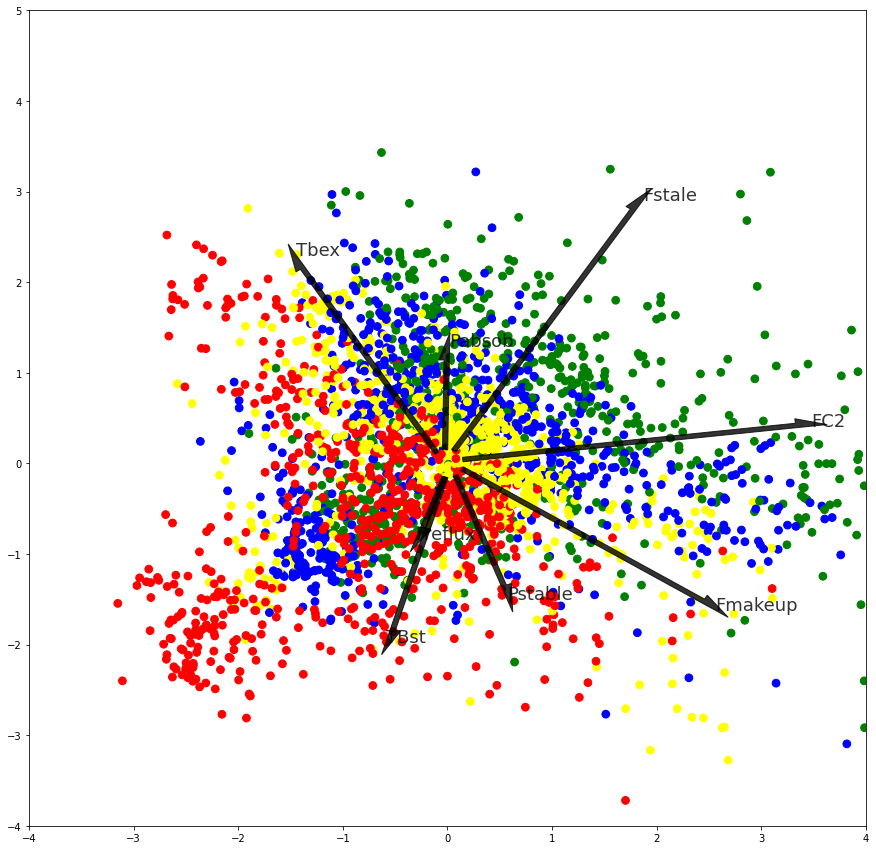

In [12]:
plt.figure(figsize=(15,15))
plt.xlim(-4,4)
plt.ylim(-4,5)

plt.scatter(reduced_X.iloc[:,1],reduced_X.iloc[:,2],s=60,marker="o",c=fcc['binner'])

vname=fcc.columns
arrow_params={'length_includes_head':True,"shape": "right", "head_starts_at_zero":True}

for i in range(8):
    x=pcc[1][i]*5
    y=pcc[2][i]*5
    txt=vname[i]
    plt.text(x,y,txt,color='black',size=18,alpha=0.8)
    plt.arrow(0,0,x,y,color='black',alpha=0.8,width=0.1, head_width=0.2, **arrow_params)

plt.show()

In [13]:
#let learn!

# data set of using X, y  directly


                  